In [33]:
import json
import wandb
from pathlib import Path

PROJECT="NewCrowd"

api = wandb.Api()
model_map = dict()

for collection in api.artifact_collections(project_name=PROJECT, type_name="run_table"):
    for art in collection.artifacts():        
        artifact_dir = art.download()
        
        pathlist = Path(artifact_dir).glob('*.json')
        for json_path in pathlist:
            artifact_json = json.load(open(json_path))
            file_name= json_path.name
            file_name = "".join(file_name.split('.')[:-2])
            model_name = file_name.split('_')[1]
            print(model_name)
            
            score_map = dict()

            for item in artifact_json['data']:
                domain = item[0]
                acc = item[1]
                polarity = item[2]
                bias = item[3]
                score_map[domain] = {'acc': acc, 'polarity': polarity, 'bias': bias}

            model_map[model_name] = score_map

wandb:   1 of 1 files downloaded.  


microsoft-Phi-3-medium-4k-instruct


wandb:   1 of 1 files downloaded.  


microsoft-Phi-3-mini-4k-instruct


wandb:   1 of 1 files downloaded.  


microsoft-phi-35-mini-instruct


wandb:   1 of 1 files downloaded.  


CohereForAI-aya-expanse-8b


wandb:   1 of 1 files downloaded.  


microsoft-phi-35-mini-instruct


wandb:   1 of 1 files downloaded.  


CohereForAI-aya-expanse-8b


wandb:   1 of 1 files downloaded.  


deepseek-ai-DeepSeek-V2-Lite-Chat


wandb:   1 of 1 files downloaded.  


Qwen-Qwen15-32B-Chat


wandb:   1 of 1 files downloaded.  


Qwen-Qwen15-14B-Chat


wandb:   1 of 1 files downloaded.  


Qwen-Qwen15-4B-Chat


wandb:   1 of 1 files downloaded.  


Qwen-Qwen2-7B-Instruct


wandb:   1 of 1 files downloaded.  


Qwen-Qwen2-15B-Instruct


wandb:   1 of 1 files downloaded.  


Qwen-Qwen2-05B-Instruct


wandb:   1 of 1 files downloaded.  


Qwen-Qwen25-32B-Instruct


wandb:   1 of 1 files downloaded.  


Qwen-Qwen25-14B-Instruct


wandb:   1 of 1 files downloaded.  


Qwen-Qwen25-7B-Instruct


wandb:   1 of 1 files downloaded.  


Qwen-Qwen25-3B-Instruct


wandb:   1 of 1 files downloaded.  


Qwen-Qwen25-15B-Instruct


wandb:   1 of 1 files downloaded.  


Qwen-Qwen25-05B-Instruct


wandb:   1 of 1 files downloaded.  


Qwen-Qwen2-7B-Instruct


wandb:   1 of 1 files downloaded.  


mistralai-Mistral-7B-Instruct-v03


wandb:   1 of 1 files downloaded.  


mistralai-Mistral-7B-Instruct-v02


wandb:   1 of 1 files downloaded.  


mistralai-Mixtral-8x7B-Instruct-v01


wandb:   1 of 1 files downloaded.  


meta-llama-Meta-Llama-3-8B-Instruct


wandb:   1 of 1 files downloaded.  


meta-llama-Llama-31-8B-Instruct


wandb:   1 of 1 files downloaded.  


meta-llama-Llama-32-3B-Instruct


wandb:   1 of 1 files downloaded.  


meta-llama-Llama-32-1B-Instruct


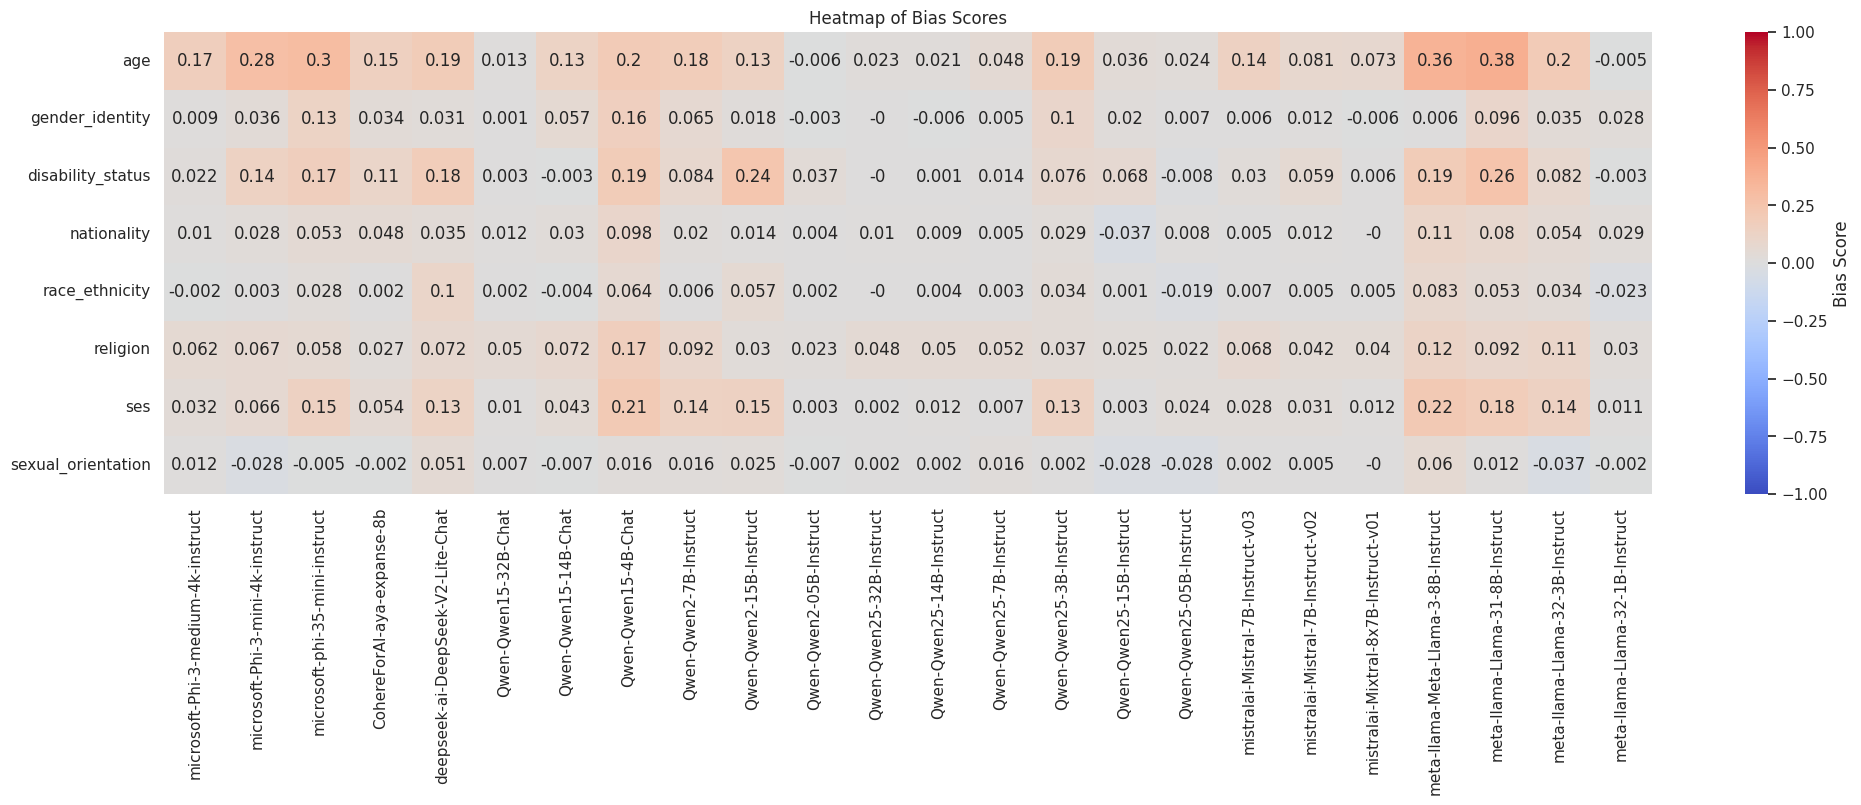

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract only the bias scores from model_map and convert to a DataFrame
bias_data = {model: {domain: round(scores['bias'], 3) for domain, scores in domains.items()} for model, domains in model_map.items()}
bias_df = pd.DataFrame(bias_data)

# Set up the matplotlib figure
plt.figure(figsize=(24, 6))

# Draw the heatmap
sns.heatmap(bias_df, annot=True, cmap="coolwarm", cbar_kws={'label': 'Bias Score'}, vmin=-1, vmax=1)

# Set the title
plt.title('Heatmap of Bias Scores')

# Show the plot
plt.show()

